# Average Order Value Higher Than Expected #
## Orders for March, 2017 ##
### A reasonable replacement metric for the average order value is the median order value. ###
### Median Order Value: $284 ###
#### Alternatively, an AOV calculated after removing outliers in item price or order quantity could be used. ####
#### Modified AOV: $300 ####

The average, or mean, order value is not a good representation of a typical order for the 100 shops. The higher than expected average is influenced by a few factors:
 - Shop 78 has shoes priced at $25,725. This is probably incorrect. The high value is pulling up the value of the average order from other shops.
 - Shop 42 has 17 orders for 2,000 items, which are billed at $704,000 each. No other store has an order for more than 8 items. These orders have an outsize effect on the average order value.
 - Shop 42, in addition to filling large orders, has shoes priced at \$352. The other 98 shops have items ranging from \$90 to \$201. This is a borderline case of an outlier compared to the previous two examples, but it is worth noting.

Medians are not influenced by a few extreme values, and in this case it is a good choice to represent a typical, or central, value.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# Load the data and create a column for item price
df = pd.read_csv('2019_Winter_Data_Science_Intern_Challenge_Data_Set.csv', parse_dates=['created_at'])
df['item_price'] = df['order_amount'] / df['total_items']

The summary information below suggests two issues to investigate.
 - The largest order has 2,000 items. Are such large orders to be expected?
 - The most expensive item costs $25,725. This is likely an error.

In [3]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items,item_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


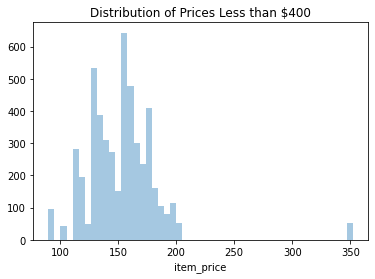

In [4]:
# In addition to the $25,725 price, there is one around $350 that stands apart from the rest
most_prices = df[df['item_price'] <= 400]
sns.distplot(most_prices['item_price'], kde=False).set_title('Distribution of Prices Less than $400');


In [5]:
# The lowest price shoe is $90
# Only shops 42 and 78 have shoes priced above $201
df[['shop_id', 'item_price']].groupby(by='shop_id').max('item_price').sort_values(by='item_price')

,item_price
shop_id,
92,90.0
2,94.0
32,101.0
100,111.0
7,112.0
...,...
99,195.0
89,196.0
12,201.0


In [6]:
# Order quantities are between 1 and 8, except for orders for 2,000 units
df.groupby(by='total_items')['order_id'].count()

total_items
1       1830
2       1832
3        941
4        293
5         77
6          9
8          1
2000      17
Name: order_id, dtype: int64

In [7]:
# All 17 orders for 2,000 units were placed with Shop 42
df[df['total_items'] > 8].sort_values(['shop_id', 'created_at' ])

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00,352.0
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00,352.0
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00,352.0


In [8]:
# Average order value for all orders
df['order_amount'].sum() / len(df)

3145.128

In [9]:
# Average order value for shops with prices less than $350, which also excludes all orders of 2,000 units
main_98 = df[~df['shop_id'].isin([42, 78])]
main_98['order_amount'].sum() / len(main_98)

300.1558229655313